In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Reading the txt data and storing in list

In [3]:
train_dir = "../input/imbdRawDataset/train"

In [4]:
texts = []
labels = []

for label_type in ["pos", "neg"]:
    dir_path = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_path):
        if ".txt" in fname:
            fobj = open(os.path.join(dir_path, fname), encoding="utf8")
            texts.append(fobj.read())
            fobj.close()
            
        if label_type == "pos":
            labels.append(1)
            
        else:
            labels.append(0)

In [5]:
print(len(texts), len(labels))

25000 25000


### Tokenization

In [6]:
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence

max_words = 10000
maxlen = 150
training_samples = 500
validation_samples = 10000

tokenizer = text.Tokenizer(num_words=max_words, char_level=False)
tokenizer.fit_on_texts(texts)

# Transforms each text in texts to a sequence of integers. Only words known by the tokenizer (i.e. num_words) 
# will be taken into account considering.
sequences = tokenizer.texts_to_sequences(texts)

In [7]:
tokenizer.get_config()

{'num_words': 10000,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 25000,
 'word_counts': '{"bromwell": 8, "high": 2143, "is": 107313, "a": 163040, "cartoon": 543, "comedy": 3218, "it": 79058, "ran": 237, "at": 23507, "the": 336148, "same": 4050, "time": 12682, "as": 46927, "some": 15743, "other": 9079, "programs": 66, "about": 17371, "school": 1631, "life": 6556, "such": 5135, "teachers": 75, "my": 12492, "35": 95, "years": 4503, "in": 93934, "teaching": 82, "profession": 65, "lead": 1303, "me": 10742, "to": 135708, "believe": 2504, "that": 69787, "high\'s": 1, "satire": 260, "much": 9758, "closer": 206, "reality": 977, "than": 9919, "scramble": 6, "survive": 260, "financially": 29, "insightful": 65, "students": 358, "who": 20599, "can": 11120, "see": 11460, "right": 3304, "through": 4969, "their": 11376, "pathetic": 465, "teachers\'": 1, "pomp": 9, "pettiness": 2, "of": 145847, "whole": 

In [8]:
## understanding the tokenizer.texts_to_sequences(texts)

print(len(sequences))
print(type(sequences), len(sequences[1]))

## sequences[0] represents a list which contains idxs for each word in the 1st sequences considering it should be in 
## num_words = 10000
print(sequences[0])

25000
<class 'list'> 400
[309, 6, 3, 1069, 209, 9, 2161, 30, 1, 169, 55, 14, 46, 82, 5844, 41, 392, 110, 138, 14, 5340, 58, 4449, 150, 8, 1, 4988, 5924, 482, 69, 5, 261, 12, 2002, 6, 73, 2425, 5, 632, 71, 6, 5340, 1, 5, 2003, 1, 5925, 1534, 34, 67, 64, 205, 140, 65, 1230, 1, 4, 1, 223, 901, 29, 3022, 69, 4, 1, 5845, 10, 693, 2, 65, 1534, 51, 10, 216, 1, 387, 8, 60, 3, 1467, 3712, 800, 5, 3513, 177, 1, 392, 10, 1237, 30, 309, 3, 353, 344, 2974, 143, 130, 5, 7799, 28, 4, 126, 5340, 1467, 2373, 5, 309, 10, 532, 12, 108, 1468, 4, 58, 555, 101, 12, 309, 6, 227, 4174, 48, 3, 2232, 12, 9, 215]


In [9]:
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique words in the text")

# to make all the sequences of same length and conversion to numpy array
tokenized_data = sequence.pad_sequences(sequences, maxlen=maxlen)
print(tokenized_data.shape, type(tokenized_data))


labels = np.array(labels)
print(labels.shape, type(labels))

Found 88582 unique words in the text
(25000, 150) <class 'numpy.ndarray'>
(25000,) <class 'numpy.ndarray'>


### Shuffle the dataset

In [10]:
idxs = np.arange(tokenized_data.shape[0])
np.random.shuffle(idxs)
idxs

array([ 4201,  6054, 18964, ..., 14299,  5734, 12111])

In [11]:
tokenized_data = tokenized_data[idxs]
labels = labels[idxs]


x_train = tokenized_data[:training_samples]  # tokenized_data[:200]
y_train = labels[:training_samples]

x_valid = tokenized_data[training_samples: training_samples+validation_samples]  # tokenized_data[200:10000+200]
y_valid = labels[training_samples: training_samples+validation_samples]

## Parsing the GloVe Embedding

In [12]:
embedding_path = "../input/glove.6B"

embedding_index = {}
f = open(os.path.join(embedding_path, "glove.6B.100d.txt"))

for line in f:
    values = line.split(" ")
    word = values[0]
    # word associated vectors are in list, converting to np.array
    vector_associated_with_word = np.array(values[1:], dtype=np.float32)
    print(vector_associated_with_word.shape)
    embedding_index[word] = vector_associated_with_word
    break
    
f.close()
embedding_index

(100,)


{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [13]:
### So, glove.6B has 400000 word vectors, meaning for these many words they have word-word relations
### bt in our cases we have around 88582 unique words in the text i.e. len(tokenizer.word_index)

In [14]:
embedding_path = "../input/glove.6B"

embedding_index = {}
f = open(os.path.join(embedding_path, "glove.6B.100d.txt"), encoding="utf8")

for line in f:
    values = line.split(" ")
    word = values[0]
    # storing as numpy array
    vector_associated_with_word = np.array(values[1:], dtype=np.float32)
    embedding_index[word] = vector_associated_with_word
    
f.close()
print(f"Found {len(embedding_index)} of word vectors")

Found 400000 of word vectors


In [2]:
word_index = tokenizer.word_index
for k, v in word_index.items():
    print(k, v)
    break
    
len(word_index)

NameError: name 'word_index' is not defined

In [16]:
## embedding_dim = 100 bcz the shape of word_vector for each word in glove is 100
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, idx in word_index.items():
    if idx < max_words:
        ## embedding_matrix idx position filled by embedding_index word vector
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

In [17]:
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = models.Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                480032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.layers

In [19]:
model.compile( 
    optimizer='rmsprop',
    loss=["binary_crossentropy"],
    metrics=["acc"],)

# my_callbacks = [
    
#     tf.keras.callbacks.EarlyStopping(patience=2),
#     tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}_{val_loss:.2f}.h5')     
# ]

history = model.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    epochs=10, 
#     callbacks= my_callbacks,
    verbose=1, 
    validation_data = (x_valid, y_valid),
)

model.save_weights("pre_trained_glove_model_weigts.h5")

Epoch 1/10
16/16 [==============================] - 1s 40ms/step - loss: 1.2865 - acc: 0.5160 - val_loss: 0.6932 - val_acc: 0.4983
Epoch 2/10
16/16 [==============================] - 1s 34ms/step - loss: 0.6819 - acc: 0.5380 - val_loss: 0.7391 - val_acc: 0.5022
Epoch 3/10
16/16 [==============================] - 1s 31ms/step - loss: 0.6713 - acc: 0.5580 - val_loss: 0.7005 - val_acc: 0.5017
Epoch 4/10
16/16 [==============================] - 0s 31ms/step - loss: 0.6854 - acc: 0.5920 - val_loss: 0.7016 - val_acc: 0.5013
Epoch 5/10
16/16 [==============================] - 1s 36ms/step - loss: 0.5971 - acc: 0.6440 - val_loss: 0.6863 - val_acc: 0.5684
Epoch 6/10
16/16 [==============================] - 1s 36ms/step - loss: 0.5409 - acc: 0.7380 - val_loss: 0.6867 - val_acc: 0.5548
Epoch 7/10
16/16 [==============================] - 1s 36ms/step - loss: 0.4933 - acc: 0.7780 - val_loss: 0.7212 - val_acc: 0.5062
Epoch 8/10
16/16 [==============================] - 1s 38ms/step - loss: 0.4634 - a

## Plotting the results

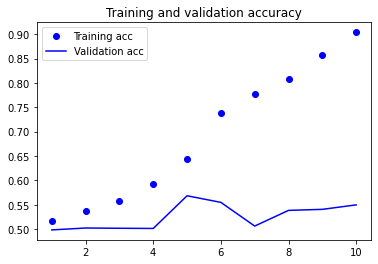

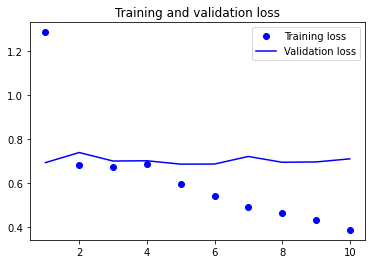

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## using functional api

In [21]:
# from tensorflow.keras import Input
# from tensorflow.keras import layers

# def embedd_model_functional_API(input_shape, num_classes=1):
#     input_tensor = Input(shape=input_shape)
#     x = layers.Embedding(max_words, embedding_dim)(input_tensor)
#     x = layers.Flatten()(x)
#     x = layers.Dense(32, activation="relu")(x)
    
#     if num_classes == 1:
#         units = 1 
#         activation = "sigmoid"
        
#     else:
#         units = num_classes 
#         activation = "softmax"
        
#     output_tensor = layers.Dense(units, activation=activation)(x)

#     return keras.Model(input_tensor, output_tensor)

# model = embedd_model_functional_API(input_shape=(maxlen,), num_classes=1)
# model.summary()

In [22]:
# model.layers[1].set_weights([embedding_matrix])
# model.layers[1].trainable = False

# model.layers

In [23]:
# training_samples = 15000
# validation_samples = 1000

# x_train = tokenized_data[:training_samples]  # tokenized_data[:200]
# y_train = labels[:training_samples]

# x_valid = tokenized_data[training_samples: training_samples+validation_samples]  # tokenized_data[200:10000+200]
# y_valid = labels[training_samples: training_samples+validation_samples]


# model.compile( 
#     optimizer='rmsprop',
#     loss=["binary_crossentropy"],
#     metrics=["acc"],)


# history = model.fit(
#     x_train, 
#     y_train, 
#     batch_size=32, 
#     epochs=10, 
# #     callbacks= my_callbacks,
#     verbose=1, 
#     validation_data = (x_valid, y_valid),
# )

# model.save_weights("pre_trained_glove_model.h5")

In [24]:
# import matplotlib.pyplot as plt

# train_acc = history.history["acc"]
# val_acc = history.history["val_acc"]

# epochs = range(1, len(val_acc)+1)

# plt.title("Training Accuracy vs Validation Accuracy")
# plt.plot(epochs, train_acc, "bo", label='Training acc')
# plt.plot(epochs, val_acc, "-", label='Validation acc')
# plt.legend()
# plt.show()

# train_loss = history.history["loss"]
# val_loss = history.history["val_loss"]
# plt.title("Training Loss vs Validation Loss")
# plt.plot(epochs, train_loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "-", label="validation loss")
# plt.legend()
# plt.show()

## Evaluating on test data

In [26]:
import glob
test_dir = "../input/imbdRawDataset/test"

test_data_texts = []
test_data_labels = []

for label in ["pos", "neg"]:
    data_dir = os.path.join(test_dir, label)
    txtfiles = glob.glob(os.path.join(data_dir, "*.txt"))
    for fname in txtfiles:
        if ".txt" in fname:
            print(fname)
            f = open(fname, encoding="utf-8")
            test_data_texts.append(f.read())
            f.close
            
        if label == "pos":
            test_data_labels.append(1)
        else:
            test_data_labels.append(0) 

../input/imbdRawDataset/test\pos\0_10.txt
../input/imbdRawDataset/test\pos\10000_7.txt
../input/imbdRawDataset/test\pos\10001_9.txt
../input/imbdRawDataset/test\pos\10002_8.txt
../input/imbdRawDataset/test\pos\10003_8.txt
../input/imbdRawDataset/test\pos\10004_9.txt
../input/imbdRawDataset/test\pos\10005_8.txt
../input/imbdRawDataset/test\pos\10006_7.txt
../input/imbdRawDataset/test\pos\10007_10.txt
../input/imbdRawDataset/test\pos\10008_8.txt
../input/imbdRawDataset/test\pos\10009_10.txt
../input/imbdRawDataset/test\pos\1000_9.txt
../input/imbdRawDataset/test\pos\10010_9.txt
../input/imbdRawDataset/test\pos\10011_9.txt
../input/imbdRawDataset/test\pos\10012_9.txt
../input/imbdRawDataset/test\pos\10013_9.txt
../input/imbdRawDataset/test\pos\10014_7.txt
../input/imbdRawDataset/test\pos\10015_8.txt
../input/imbdRawDataset/test\pos\10016_8.txt
../input/imbdRawDataset/test\pos\10017_8.txt
../input/imbdRawDataset/test\pos\10018_8.txt
../input/imbdRawDataset/test\pos\10019_8.txt
../input/imb

In [32]:
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence

max_words = max_words
maxlen = maxlen

testTokenizer = text.Tokenizer(num_words=max_words)
testTokenizer.fit_on_texts(test_data_texts)

sequences = testTokenizer.texts_to_sequences(test_data_texts)

x_test = sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.array(test_data_labels, dtype=np.float32)

In [33]:
model.load_weights("pre_trained_glove_model.h5")

In [35]:
test_acc, test_loss = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7573 - acc: 0.5100


In [37]:
test_acc, test_loss

(0.7573260068893433, 0.5099599957466125)